# Домашнее задание 1

__Оценки-баллы__: 
- 1: 1-2
- 2: 3-6
- 3: 7-9
- 4: 10-13
- 5: 14-16
- 6: 17-19
- 7: 20-22
- 8: 23-26
- 9: 27-29
- 10: 30-32

__Литература__: 

- 1) An Introduction to Statistical Learning - облегченная версия следующей книги с небольшим количеством матана, примеры реализованы на R. Электронная версия книги - бесплатная: http://faculty.marshall.usc.edu/gareth-james/

По этой книге также есть онлайн-курс от Стенфорда

- 2)The Elements of Statistical Learning - полный классический учебник по статистическому обучению, много математики. Книга, кстати, тоже бесплатна для скачивания: https://web.stanford.edu/~hastie/ElemStatLearn//


__DL (срок сдачи ДЗ)__: 15.10.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw1_3_ivanov_i_i.ipynb

### Описательные статистики

In [213]:
import pandas as pd
%matplotlib inline 

Подгрузим данные и посмотрим на первые пять строчек из таблицы.

In [214]:
df = pd.read_csv('./vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 98 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   city                             328 non-null    object 
 1   country                          364 non-null    object 
 2   first_name                       425 non-null    object 
 3   home_town                        112 non-null    object 
 4   in_hse_memes_group               425 non-null    bool   
 5   is_bmm                           425 non-null    bool   
 6   is_closed                        425 non-null    bool   
 7   last_name                        425 non-null    object 
 8   likes_memes                      384 non-null    float64
 9   uid                              425 non-null    int64  
 10  male_dummy                       425 non-null    int64  
 11  facebook_dummy                   425 non-null    int64  
 12  instagram_dummy       

#### Задание 1 [2]

В переменной `wall_text` лежат тексты со стен всех пользователей.

* Постройте распределение длин для всех стен. 
* Сколько людей написали на своей стенке хотя бы раз название своего вуза?


In [216]:
df.wall_text.head()

0         Давай поговорим о личном   Буду вашим кот...
1        Лучший фотограф😻😻        ой,  может даже у...
2    🚀 [id18115779|Баха], спасибо за атмосферу 🌌 \n...
3    Не проходите мимо! Приходите к нам! Ждём всех!...
4    Нам пора признать, что зимний сезон следует сд...
Name: wall_text, dtype: object

In [217]:
hse_names = ['вшэ','hse', 'высшая школа экономики', 'вышечка', 'вышка', 'самый либеральный вуз']
pattern = '|'.join(hse_names)
# df['wall_text_hse'] = df['wall_text'].apply(lambda x: any([word in x for word in hse_names]))

In [218]:
import numpy as np

In [219]:
df['wall_text'] = df['wall_text'].str.lower()

In [220]:
df['wall_text_hse'] = np.where(df['wall_text'].str.contains(pattern) == True, 1, 0)

In [221]:
df['wall_text'][df['wall_text_hse'] == 1]

62      интенсив по подготовке к егэ по обществознани...
68     проваленные дэдлайны… истрёпанные нервы… низка...
94         mood:  (( fuck12  #свободуегоружукову #fre...
100    inst:kamiism   when i saw u, i felt something ...
119           i had a purpose, to bring laughter and ...
183    мое лицо, когда @_l3uxpb_ сказал, что в армии ...
185           артем с днем рождения!! успехов, крутых...
226     кодзима    ля студенто де вышка\n#hse     pre...
229         mood of the day    омг! ☺🙃   такие смешны...
296      hse student 🎉   спасибо за то, что вы были, ...
Name: wall_text, dtype: object

In [222]:
len(df['wall_text'][df['wall_text_hse'] == 1])

10

<AxesSubplot:>

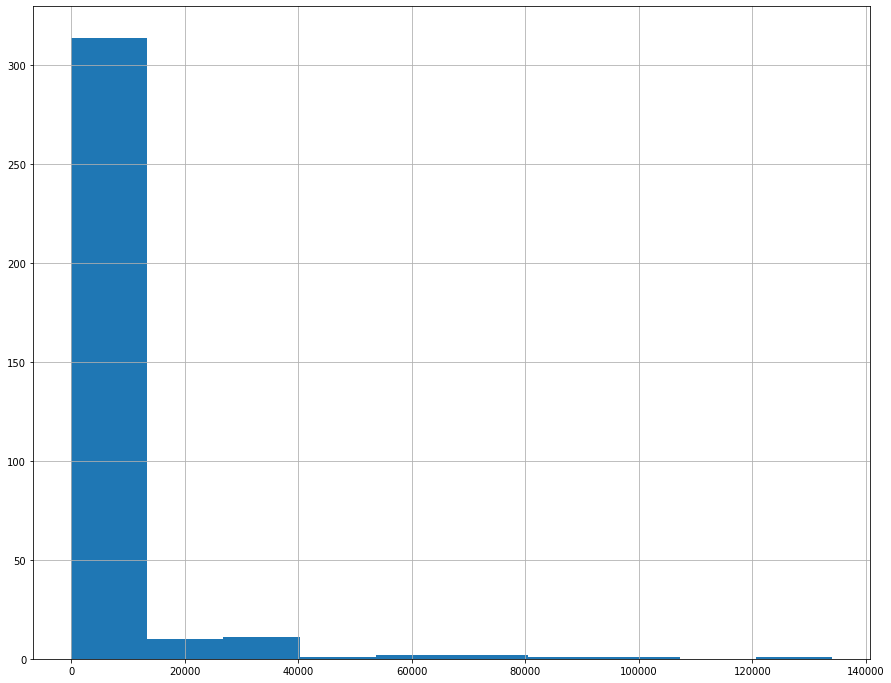

In [223]:
df['wall_text_len_cnt'].hist(figsize=(15,12))

In [224]:
df.wall_text_len_cnt

0         188.0
1      103157.0
2          83.0
3        5593.0
4        2681.0
         ...   
420         0.0
421        23.0
422     33098.0
423       705.0
424       929.0
Name: wall_text_len_cnt, Length: 425, dtype: float64

#### Задание 2 [1]

Вывести имена самых больших любителей мемов (топ 1\% значений по колонке `likes_memes`. Итоговую табличку отсортировать по числу оставленных в группе лайков.

In [225]:
one_perc = int(len(df) * 0.01)
df.sort_values(by = ["likes_memes"], ascending=False)[0:one_perc][['first_name', 'likes_memes']]

,first_name,likes_memes
134,Полина,1081.0
363,Николь,685.0
205,Александр,440.0
189,Данил,398.0


#### Задание 3 [1]

Построить гистограммы для параметров `wall_emoji_cnt` (число эмодзи на стене у человека) и `wall_comment_cnt` (число коментов на стене у человека). Где больше выбросов?

array([[<AxesSubplot:title={'center':'wall_emoji_cnt'}>,
        <AxesSubplot:title={'center':'wall_comment_cnt'}>]], dtype=object)

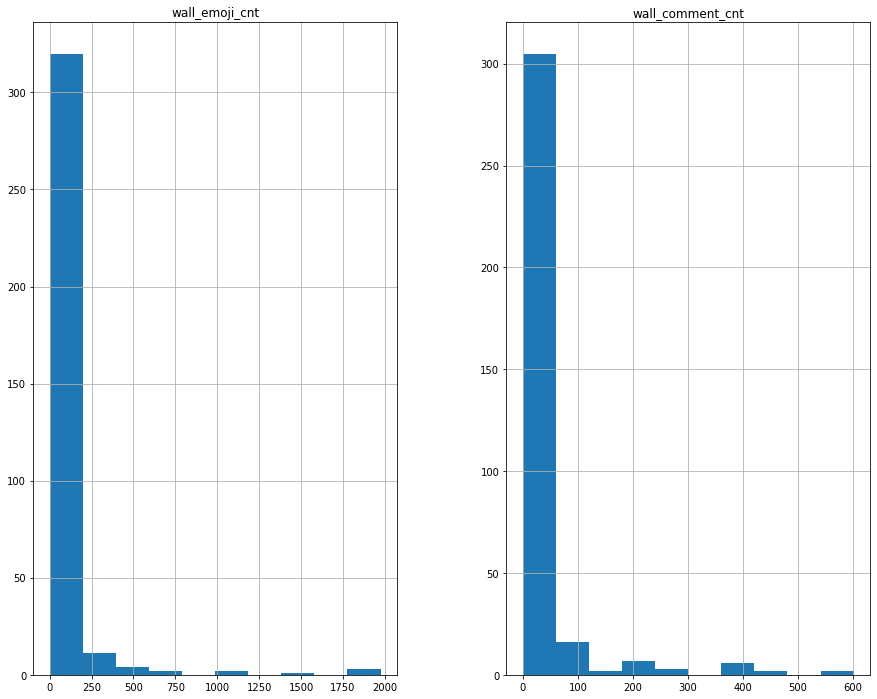

In [226]:
df[['wall_emoji_cnt', 'wall_comment_cnt']].hist(figsize=(15,12))

In [227]:
import seaborn as sns

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wall_emoji_cnt'>

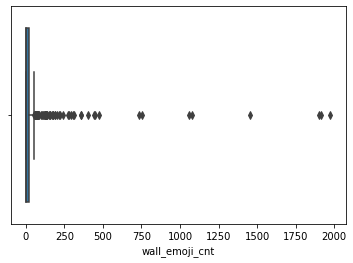

In [228]:
sns.boxplot(df['wall_emoji_cnt'])

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wall_comment_cnt'>

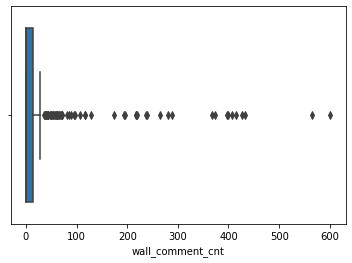

In [229]:
sns.boxplot(df['wall_comment_cnt'])

<AxesSubplot:>

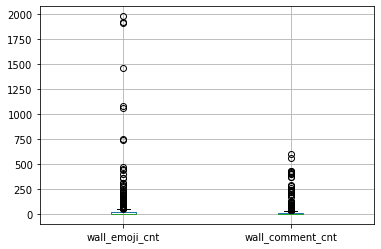

In [230]:
df[['wall_emoji_cnt', 'wall_comment_cnt']].boxplot()

Сравните для обоих показателей средние с медианами. Какие выводы о хвостах распределений и выбросах можно сделать из этого сравнения?

In [231]:
df['wall_emoji_cnt'].mean()

62.90962099125365

In [232]:
df['wall_emoji_cnt'].median()

2.0

In [233]:
df['wall_comment_cnt'].mean()

29.632653061224488

In [234]:
df['wall_comment_cnt'].median()

0.0

Значения смещены к нулю, хвосты положительные

#### Задание 4 [1]

Посчитайте соотношение полов в направлениях по маркетингу и менеджменту (`is_bmm` - с маркетинга - $1$, с менеджмента - $0$). Проинтерпретируйте итоговые показатели. Где больше парней? Во сколько раз?

<AxesSubplot:>

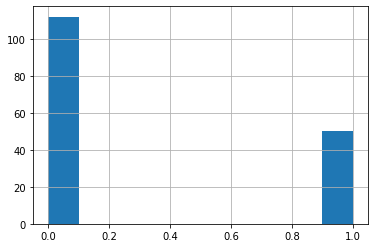

In [235]:
df['male_dummy'][df['is_bmm'] == True].hist()

<AxesSubplot:>

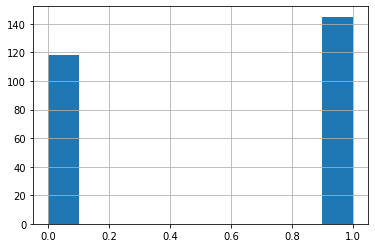

In [236]:
df['male_dummy'][df['is_bmm'] == False].hist()

In [237]:
len(df[(df.is_bmm == False) & (df.male_dummy == True)]) / len(df[(df.is_bmm == True) & (df.male_dummy == True)])

2.9

Больше парней на менеджменте почти в 3 раза

#### Задание 5 [2]

Каждый студент добавляет к себе в друзья людей со своего потока. В переменной `friends_mail_from_course_pct` записана доля парней-друзей с потока (то, что переменная называется не `male` - опечатка).

Постройте гистограмму для распределения доли парней в друзьях для девушек и для парней. Обе гистограммы постройте на одной картинке.

In [239]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Доля друзей парней у парней')

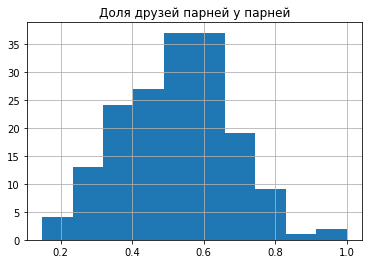

In [240]:
df['friends_mail_from_course_pct'][df.male_dummy == True].hist()
plt.title('Доля друзей парней у парней')

Text(0.5, 1.0, 'Доля друзей парней у девушек')

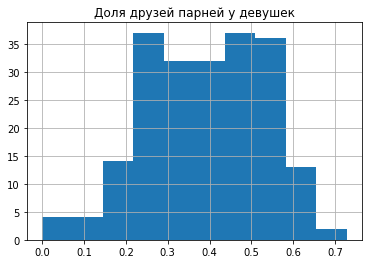

In [241]:
df['friends_mail_from_course_pct'][df.male_dummy == False].hist()
plt.title('Доля друзей парней у девушек')

Посчитайте для обеих групп среднее и дисперсию. Какие выводы вы можете сделать на основе посчитанных статистик?

In [242]:
df['friends_mail_from_course_pct'][df.male_dummy == False].mean()

0.3915219303663434

In [243]:
df['friends_mail_from_course_pct'][df.male_dummy == False].var()

0.019619921629458366

In [244]:
df['friends_mail_from_course_pct'][df.male_dummy == True].mean()

0.5230066008581026

In [245]:
df['friends_mail_from_course_pct'][df.male_dummy == True].var()

0.0234967542277464

Девочки в среднем больше дружат вк с девочками, мальчики в среднем добавляют в друзья примерно столько же девочек, сколько мальчиков

#### Задание 6 [3]

Давайте проанализируем колонку со средним кол-во фото в месяц (`photo_month_mean`)

* Постройте на одной картинке гистограмы для распределения этого показателя по разным полам. 
* Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
* Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Не забывайте подгрузить пакет `matplotlib`!  Все свои рассуждения пишите прямо по ходу кода

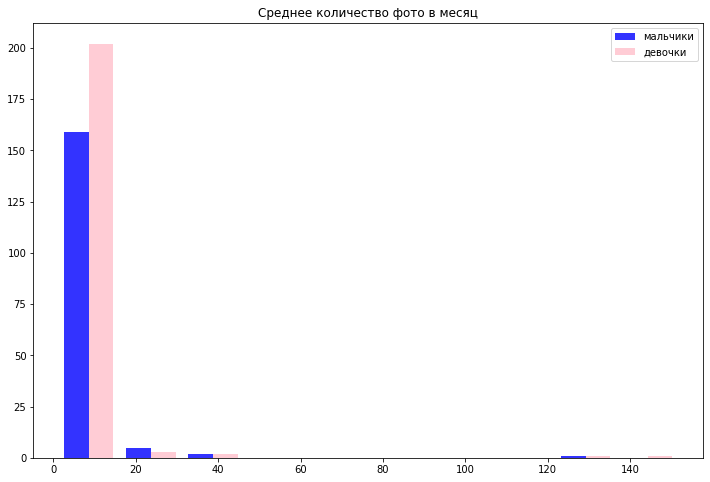

In [246]:
boys_photo = df['photo_month_mean'][df.male_dummy == True]
girls_photo = df['photo_month_mean'][df.male_dummy == False]
colors = ['blue', 'pink']
plt.rcParams["figure.figsize"] = (12,8)
plt.hist([boys_photo, girls_photo], color=colors, alpha=0.8, label=['мальчики', 'девочки'])
plt.title("Среднее количество фото в месяц")
plt.legend()
plt.show()

In [247]:
girls_photo.describe()

count    209.000000
mean       4.453513
std       14.076101
min        1.000000
25%        1.000000
50%        1.750000
75%        3.333333
max      151.833333
Name: photo_month_mean, dtype: float64

In [248]:
boys_photo.describe()

count    167.000000
mean       4.040629
std       11.327306
min        1.000000
25%        1.000000
50%        1.500000
75%        2.683333
max      131.416667
Name: photo_month_mean, dtype: float64

Типичность пользователя определим по медиане, в таком случае типичная девушка выкладывает примерно столько же фотографий, сколько типичный парень.

<AxesSubplot:>

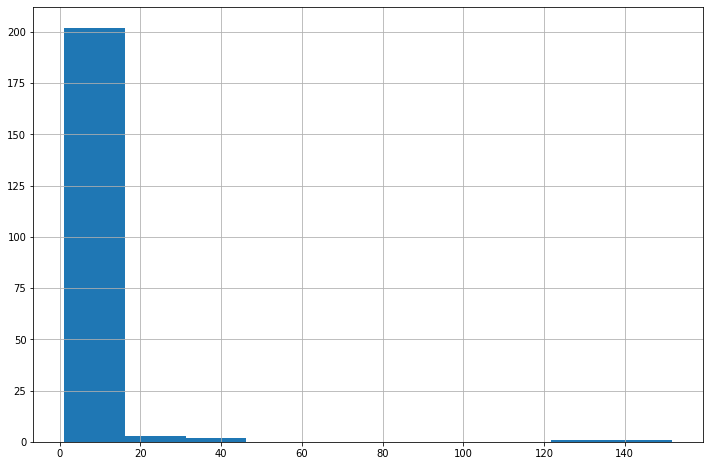

In [249]:
girls_photo.hist()

<AxesSubplot:>

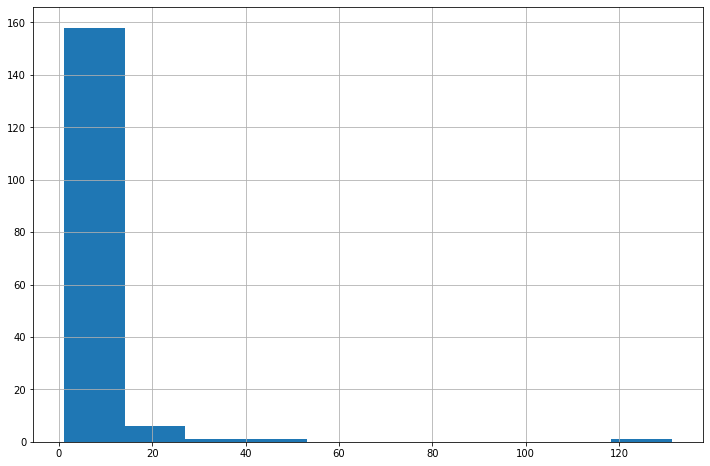

In [250]:
boys_photo.hist()

### Визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. 

В большинстве заданий для получения баллов придётся не только завести код, но и написать свои мысли в поле Ответ. Сочинения надо писать прямо в текстовых ячейках, сразу после слова Ответ.

Для начала подгрузите все необходимые библиотеки: math, numpy, pandas, matplotlib.pyplot, seaborn и включите опцию, отвечающую за прорисовку картинок прямо в тетрадке.

In [251]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные профилей и данные по фотографиям

In [252]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('./vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('./vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [253]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

,Unnamed: 0_x,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text,photo_text_len_cnt,photo_yer_mean,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,1.333333,0.0,0.0,0.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,2.0,1.0,0.105263,0.0,,0.0,3.166667,0.0,0.0,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,0.0,0.0,0.000000,0.0,,0.0,2.333333,0.0,0.0,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,12.500000,0.0,0.0,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,0.0,0.0,0.000000,0.0,,0.0,8.750000,0.0,0.0,0.0


Давайте посмотрим на все названия колонок, которые есть в таблице.

In [254]:
df.columns

Index(['Unnamed: 0_x', 'uid', 'Unnamed: 0.1', 'first_name', 'last_name',
       'is_closed', 'city', 'home_town', 'male_dummy', 'relation_cat',
       'relation_partner', 'byear', 'bmonth', 'bday', 'country',
       'facebook_dummy', 'instagram_dummy', 'skype_dummy', 'twitter_dummy',
       'home_phone_dummy', 'mobile_phone_dummy', 'site_dummy', 'folowers_cnt',
       'university_str', 'faculty_str', 'about_str', 'activities_str',
       'books_str', 'interests_str', 'movies_str', 'music_str', 'quotes_str',
       'tv_str', 'games_str', 'can_post_dummy', 'can_see_all_posts_dummy',
       'can_see_audio_dummy', 'can_write_private_message_dummy',
       'has_mobile_dummy', 'has_ava_dummy', 'wall_comments_dummy',
       'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt',
       'groups_cnt', 'mutual_friends_cnt', 'photos_cnt', 'subscriptions_cnt',
       'user_photos_cnt', 'videos_cnt', 'pages_cnt', 'alco_love_cat',
       'smoke_love_cat', 'religion_str', 'inspired_by

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, лайков, репостов и тд

In [255]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

#### Задание 7 [2]

Вытащите из переменных счётчиков только те, которые отвечают за фото.__ Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?


__Ответ:__

In [256]:
photos_var_cnt = [item for item in variables_cnt if 'photo' in item]  # сохраните нужные названия столбцов сюда

In [257]:
photos_var_cnt

['photos_cnt',
 'user_photos_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

In [258]:
# примерно такая картинка должна получиться

In [259]:
df[photos_var_cnt] = np.log(df[photos_var_cnt]+1)

array([[<AxesSubplot:title={'center':'photos_cnt'}>,
        <AxesSubplot:title={'center':'user_photos_cnt'}>,
        <AxesSubplot:title={'center':'photo_cnt'}>],
       [<AxesSubplot:title={'center':'photo_like_cnt'}>,
        <AxesSubplot:title={'center':'photo_repost_cnt'}>,
        <AxesSubplot:title={'center':'photo_text_len_cnt'}>],
       [<AxesSubplot:title={'center':'vk_photo_ava_change_cnt'}>,
        <AxesSubplot:title={'center':'vk_photo_text_url_len_cnt'}>,
        <AxesSubplot:title={'center':'vk_photo_wall_ph_post_cnt'}>]],
      dtype=object)

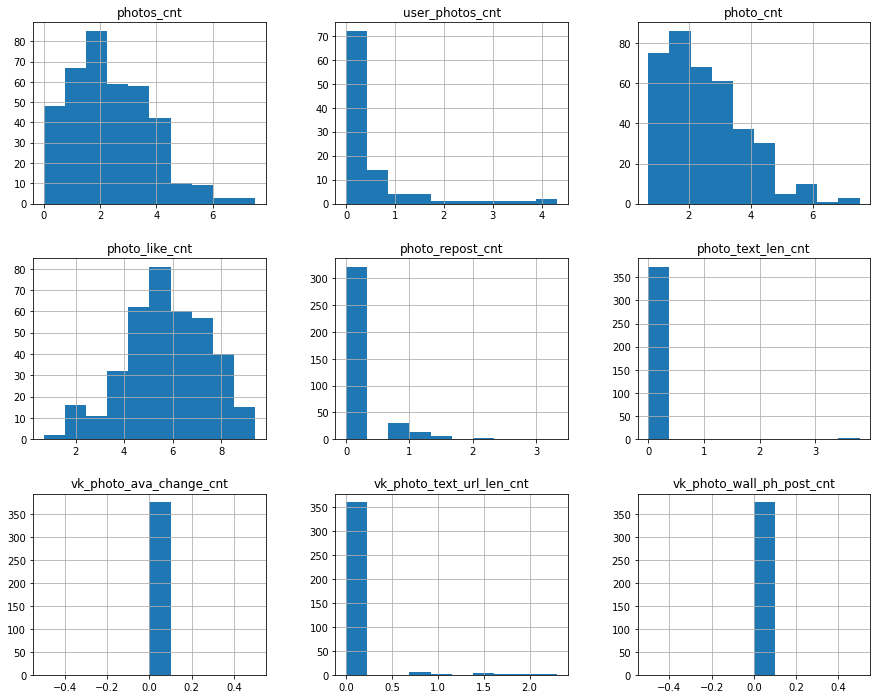

In [260]:
df[photos_var_cnt].hist(figsize=(15,12))


#### Задание 8 [2]

Кто больше постит фотографий, девушки или парни? чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

Вы уже до этого искали ответы на подобные вопросы. Тут от вас требуется построить картинку, на которй будет чётко видно что происходит с женщинами, а что с мужчинами (своя гистограмма для каждой фичи раскрашенная по мужчинам и женщинам). Попробуйте построить все $4$ картинки в рамках одной с помощью `axis`.

In [261]:
# примерно такая картинка должна получиться

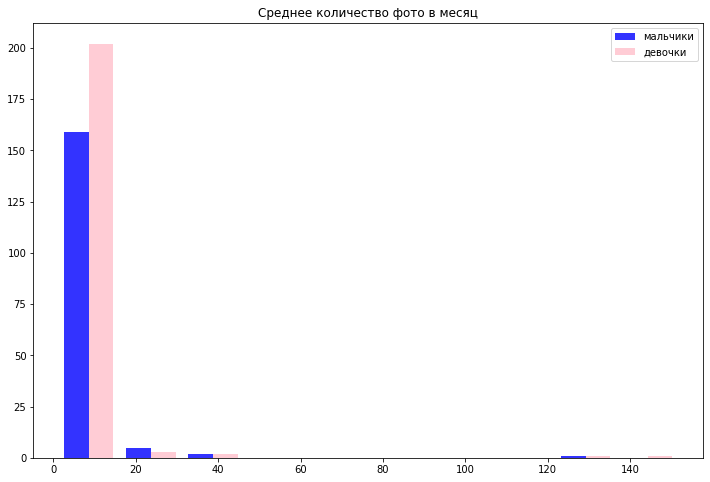

In [262]:
boys_photo = df['photo_month_mean'][df.male_dummy == True]
girls_photo = df['photo_month_mean'][df.male_dummy == False]
colors = ['blue', 'pink']
plt.rcParams["figure.figsize"] = (12,8)
plt.hist([boys_photo, girls_photo], color=colors, alpha=0.8, label=['мальчики', 'девочки'])
plt.title("Среднее количество фото в месяц")
plt.legend()
plt.show()

Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [263]:
vars_interesting = photos_var_cnt + ['male_dummy', 'friends_cnt', 'gifts_cnt']

In [264]:
df[vars_interesting].head()

,photos_cnt,user_photos_cnt,photo_cnt,photo_like_cnt,photo_repost_cnt,photo_text_len_cnt,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt,male_dummy,friends_cnt,gifts_cnt
0,1.609438,NaN,1.609438,5.736572,0.000000,0.0,0.0,0.0,0.0,0,298.0,NaN
1,2.995732,NaN,2.995732,7.970740,1.098612,0.0,0.0,0.0,0.0,0,408.0,203.0
2,2.079442,NaN,2.079442,7.786136,0.000000,0.0,0.0,0.0,0.0,1,2969.0,NaN
3,3.931826,NaN,3.931826,7.178545,0.000000,0.0,0.0,0.0,0.0,0,214.0,24.0
4,3.583519,NaN,3.583519,7.226936,0.000000,0.0,0.0,0.0,0.0,1,336.0,227.0


#### Задание 9 [2]

Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

In [265]:
df_na_zero = df[vars_interesting].fillna(0)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
    

# постройте pairplot для датасета df_na_zero

#### Задание 10 [1]

Сделайте датасет df_na_drop. Для этого проделайте всё то же самое, что выше, но вместо того, чтобы заполнять пропуски нулями - выбросите их.

In [266]:
# создание датасета для df_na_drop
    
# постройте pairplot для датасета df_na_drop

#### Задание 11 [3]

Дайте ответы на следущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили? 

__Ответ:__   

* Eсть ли тут нелинейные зависимости?

__Ответ:__   

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__  

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__  



#### Задание 12 [2]

Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

In [267]:
# Тут нужна картинка для датасета df[vars_interesting]

In [268]:
# примерно такая картинка должна получиться

In [269]:
# Тут нужна картинка для датасета df_na_zero[vars_interesting]

In [270]:
# Тут нужна картинка для датасета df_na_drop[vars_interesting]

#### Задание 13 [2]

Насколько сильно корреляционные матрицы различаются между собой? Почему? 

__Ответ:__

#### Задание 14 [2]

Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ 

#### Задание 15 [2]

Дамми-переменная это переменная, которая принимает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. 

In [271]:
# примерно такая картинка должна получиться

Правда ли, что девушки чаще указыают наличие инстаграмма на своей страничке?

__Ответ:__   

#### Задание 16 [1]

Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разбиритесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему? 

__Ответ:__  

In [272]:
# примерно такая картинка должна получиться

#### Задание 17 [1]

Как политические взгляды распределены по полам?  Постройте для этого также столбиковую диаграмму, на которой каждый стобик будет разбит на два цвета: мужчины и женщины. 

__Ответ:__  

In [273]:
# примерно такая картинка должна получиться

#### Задание 18 [2]

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

illiteracy.txt - датасет

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.